# Proyek Analisis Data: [Bike Sharing Dataset]

---


- **Nama:** Ni Kadek Dwi Putri Nova Andini
- **Email:** nova.andini2411@gmail.com
- **ID Dicoding:** MS060D5X0582

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pengguna layanan bike rental dari tahun 2011 hingga 2012?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna layanan bike rental?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load Hour Table dan Menampilkan 5 Baris Pertama**

In [3]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Load Day Table dan Menampilkan 5 Baris Pertama**

In [4]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dapat kita lihat bahwa kedua tabel memiliki data-data relevan mengenai layanan Bike Sharing yang telah dikonversi ke dalam format angka
- Dapat kita lihat bahwa kedua tabel memiliki kolom yang sama, kecuali kolom hr (hour) yang tidak dimiliki oleh tabel Day

### Assessing Data

**Memeriksa tipe data dari tiap kolom yang terdapat dalam tabel Hour dan Day**

In [5]:
hour_df.info()
# Bisa kita lihat bahwa terdapat kesalahan datatype pada kolom dteday
# seharusnya kolom dteday memiliki tipe data datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.info()
# Bisa kita lihat bahwa terdapat kesalahan datatype pada kolom dteday
# seharusnya kolom dteday memiliki tipe data datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Memeriksa adanya nilai yang hilang dari sebuah data pada tabel Hour dan Day**

In [7]:
hour_df.isna().sum()
# Bisa kita lihat bahwa tidak terdapat missing value pada tabel Hour

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.isna().sum()
# Bisa kita lihat bahwa tidak terdapat missing value pada tabel Day

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Memeriksa adanya duplikasi data pada tabel Hour dan Day**

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
# Bisa kita lihat bahwa tidak terdapat duplikasi data pada tabel Hour

Jumlah duplikasi:  0


In [33]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# Bisa kita lihat bahwa tidak terdapat duplikasi data pada tabel Day

Jumlah duplikasi:  0


**Memeriksa adanya kejanggalan pada ringkasan parameter statistik dari tabel Hour dan Day**

In [11]:
hour_df.describe()
# Bisa kita lihat bahwa tidak terdapat kejanggalan ringkasan parameter statistik dari tabel Hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
day_df.describe()
# Bisa kita lihat bahwa tidak terdapat kejanggalan pada ringkasan parameter statistik di tabel Day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dapat kita lihat bahwa terdapat kesalahan tipe data pada kolom dteday di tabel Hour dan Day
- Selain kesalahan tipe data, tidak terdapat kejanggalan di kedua tabel

### Cleaning Data

**Mengganti tipe data pada kolom dteday di tabel Hour**

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
# Mengubah tipe data dari kolom dteday pada tabel Hour

In [14]:
hour_df.info()
# Bisa kita lihat bahwa tipe data dteday sudah benar, yaitu datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Mengubah tipe data dari kolom dteday pada tabel Day**

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
# Mengubah tipe data dari kolom dteday pada tabel Day

In [16]:
day_df.info()
# Bisa kita lihat bahwa kolom dteday sudah bertipe data datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Bisa kita lihat bahwa proses cleaning data pada tabel Hour dan Day sudah berhasil
- Dapat kita simpulkan bahwa kedua data sudah clean dan bisa diproses ke tahap selanjutnya

## Exploratory Data Analysis (EDA)

### Explore hour_df Data

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [18]:
hour_df["yr"] = hour_df["yr"].replace({0: 2011, 1: 2012})

hour_df.groupby(by=["yr", "mnth"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).reset_index()


,yr,mnth,instant,casual,registered,cnt
0,2011,1,688,3073,35116,38189
1,2011,2,649,6242,41973,48215
2,2011,3,730,12826,51219,64045
3,2011,4,719,22346,72524,94870
4,2011,5,744,31050,104771,135821
5,2011,6,720,30612,112900,143512
6,2011,7,744,36452,104889,141341
7,2011,8,731,28842,107849,136691
8,2011,9,717,26545,100873,127418
9,2011,10,743,25222,98289,123511


**Mengelompokkan data berdasarkan kolom weathersit pada tabel Hour**

---



In [19]:
hour_df.groupby(by="weathersit").instant.nunique()

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

**Insight:**
- Dapat kita simpulkan bahwa kondisi cuaca berperan penting terhadap pengguna layanan Bike Sharing ini. Bisa kita lihat bahwa pengguna jauh melonjak pada cuaca yang cerah

### Explore day_df Data

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
day_df["yr"] = day_df["yr"].replace({0: 2011, 1: 2012})

customerPerMonth = day_df.groupby(by=["yr", "mnth"]).agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).reset_index()

customerPerMonth["date"] = customerPerMonth["yr"].astype(str) + "-" + customerPerMonth["mnth"].astype(str)

customerPerMonth

,yr,mnth,instant,casual,registered,cnt,date
0,2011,1,31,3073,35116,38189,2011-1
1,2011,2,28,6242,41973,48215,2011-2
2,2011,3,31,12826,51219,64045,2011-3
3,2011,4,30,22346,72524,94870,2011-4
4,2011,5,31,31050,104771,135821,2011-5
5,2011,6,30,30612,112900,143512,2011-6
6,2011,7,31,36452,104889,141341,2011-7
7,2011,8,31,28842,107849,136691,2011-8
8,2011,9,30,26545,100873,127418,2011-9
9,2011,10,31,25222,98289,123511,2011-10


**Mengelompokkan data berdasarkan kolom weathersit pada tabel Day**

In [22]:
day_df.groupby(by="weathersit").instant.nunique()

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

**Insight:**
*   Dapat kita lihat bahwa pada tabel Day, weathersit atau cuaca sangat mempengaruhi jumlah pengguna layanan Bike Sharing

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pengguna layanan bike rental dari tahun 2011 hingga 2012?

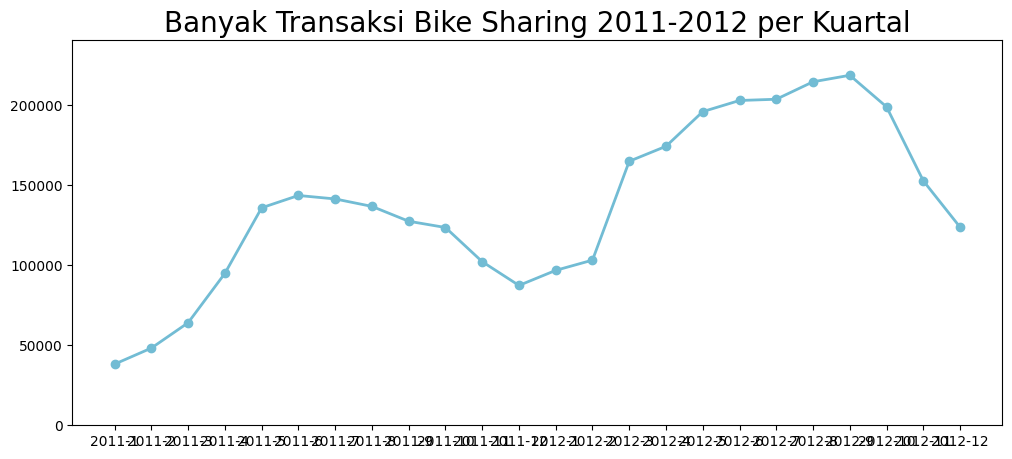

In [23]:
plt.figure(figsize=(12, 5))
plt.ylim(0, customerPerMonth["cnt"].max() * 1.1)
plt.plot(customerPerMonth["date"], customerPerMonth["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Banyak Transaksi Bike Sharing 2011-2012 per Kuartal", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Dataframe tren pengguna layanan Bike Sharing per jamnya dari 2011 hingga 2012**

In [24]:
hours_orders_df = hour_df.resample(rule='Q', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
hours_orders_df.index = hours_orders_df.index.to_period('Q').strftime('Q%q %Y')
hours_orders_df = hours_orders_df.reset_index()
hours_orders_df.rename(columns={
    "instant": "Banyak Data Transaksi",
    "cnt": "Banyak Sepeda"
}, inplace=True)
hours_orders_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\3478653918.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  hours_orders_df = hour_df.resample(rule='Q', on='dteday').agg({


,dteday,Banyak Data Transaksi,Banyak Sepeda
0,Q1 2011,2067,150449
1,Q2 2011,2183,374203
2,Q3 2011,2192,405450
3,Q4 2011,2203,313001
4,Q1 2012,2176,364756
5,Q2 2012,2182,572919
6,Q3 2012,2208,636683
7,Q4 2012,2168,475218


**Diagram tren pengguna layanan Bike Sharing per jamnya dari 2011 hingga 2012**


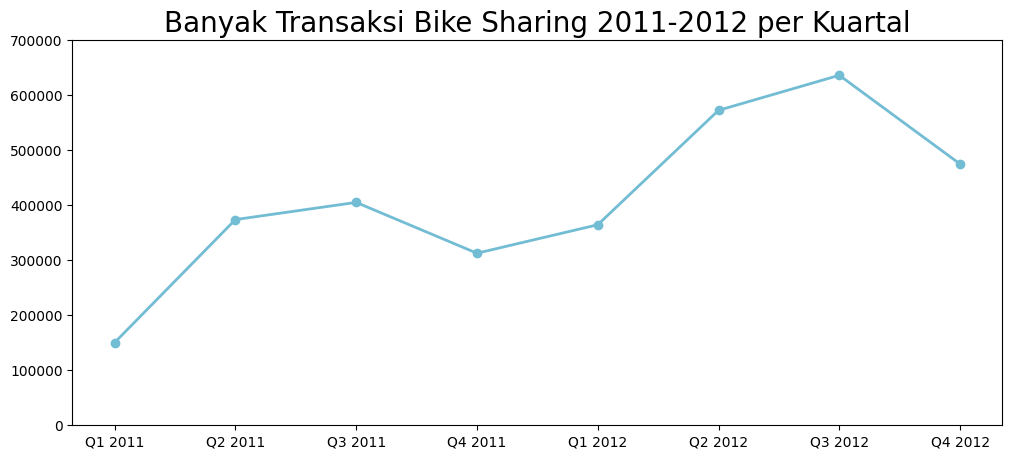

In [25]:
plt.figure(figsize=(12, 5))
plt.ylim(0, hours_orders_df["Banyak Sepeda"].max() * 1.1)
plt.plot(hours_orders_df["dteday"], hours_orders_df["Banyak Sepeda"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Banyak Transaksi Bike Sharing 2011-2012 per Kuartal", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Dataframe tren pengguna layanan Bike Sharing per harinya dari 2011 hingga 2012**

In [26]:
days_orders_df = day_df.resample(rule='Q', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
days_orders_df.index = days_orders_df.index.to_period('Q').strftime('Q%q %Y')
days_orders_df = days_orders_df.reset_index()
days_orders_df.rename(columns={
    "instant": "Banyak Data Transaksi",
    "cnt": "Banyak Sepeda"
}, inplace=True)
days_orders_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\3063793152.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  days_orders_df = day_df.resample(rule='Q', on='dteday').agg({


,dteday,Banyak Data Transaksi,Banyak Sepeda
0,Q1 2011,90,150449
1,Q2 2011,91,374203
2,Q3 2011,92,405450
3,Q4 2011,92,313001
4,Q1 2012,91,364756


**Diagram tren pengguna layanan Bike Sharing per harinya dari 2011 hingga 2012**

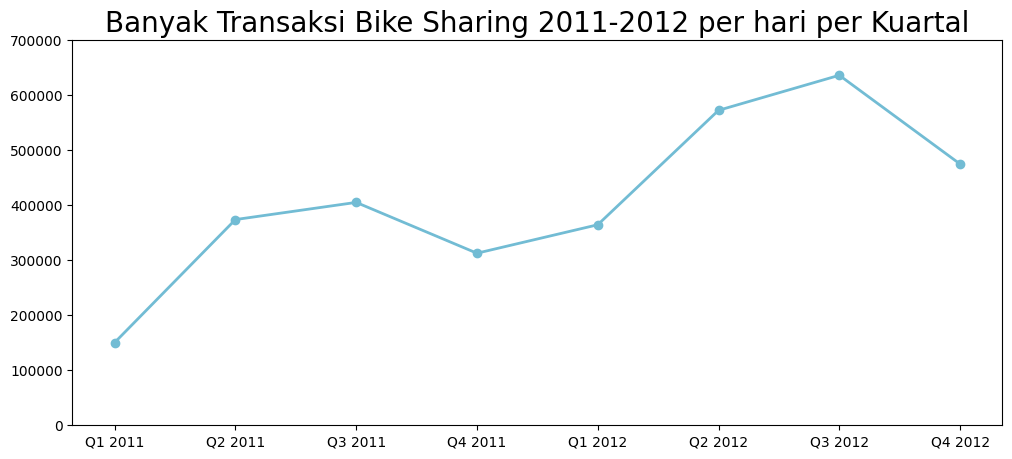

In [27]:
plt.figure(figsize=(12, 5))
plt.ylim(0, days_orders_df["Banyak Sepeda"].max() * 1.1)
plt.plot(days_orders_df["dteday"], days_orders_df["Banyak Sepeda"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Banyak Transaksi Bike Sharing 2011-2012 per hari per Kuartal", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Bisa kita lihat dari kedua dataset bahwa terdapat kenaikan data pelanggan yang signifikan sejak tahun 2011 hingga 2012, baik jumlah pesanan per jam ataupun per harinya
- Bisa kita lihat juga bahwa terdapat beberapa pola yang mirip di kuartal yang sama. Misalnya, di Q1 ke Q2 di tahun 2011 dan 2012, terdapat kenaikan jumlah pelanggan yang cukup besar. Kemudian, terdapat pula kesamaan pola dari Q3 ke Q4, yaitu adanya penurunan jumlah pesanan

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna layanan bike rental?

**Diagram pengguna layanan Bike Sharing per jamnya berdasarkan cuaca**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\3067471544.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\3067471544.py:19: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


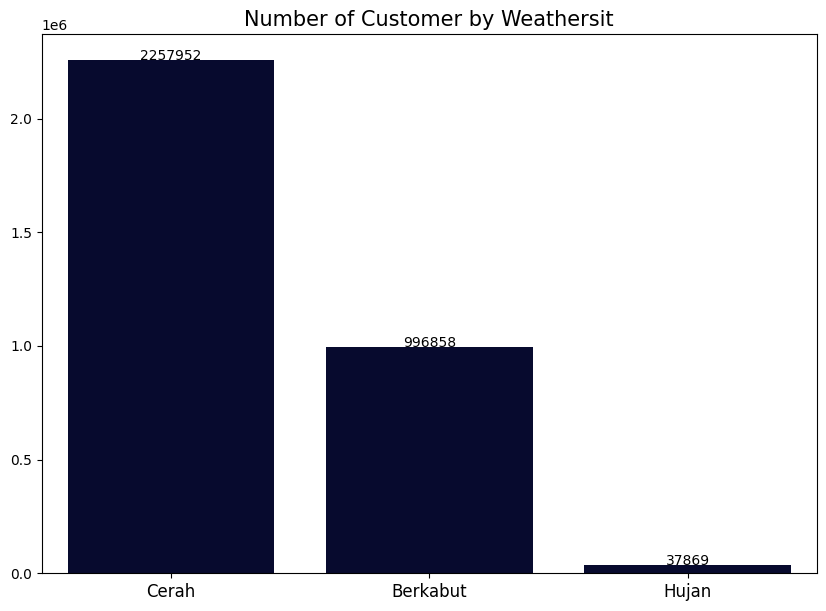

3292679


In [28]:
byweathersit_df = day_df.groupby('weathersit').agg(
    customer=('cnt', 'sum'),
    instant=('instant', 'nunique')
).reset_index()

byweathersit_df["weathersit"] = byweathersit_df["weathersit"].replace({
    1: "Cerah",
    2: "Berkabut",
    3: "Hujan",
    4: "Badai"
})

weathersit = byweathersit_df["weathersit"]

plt.figure(figsize=(10, 7))

colors = ["#000435"]

sns.barplot(
    y="customer",
    x="weathersit",
    data=byweathersit_df.sort_values(by="customer", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
for i, count in enumerate(byweathersit_df["customer"]):
    plt.text(weathersit[i], count + 10, str(count), ha='center')

plt.show()
byweathersit_df.head()
print(sum(byweathersit_df["customer"]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\1062888391.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\1062888391.py:19: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


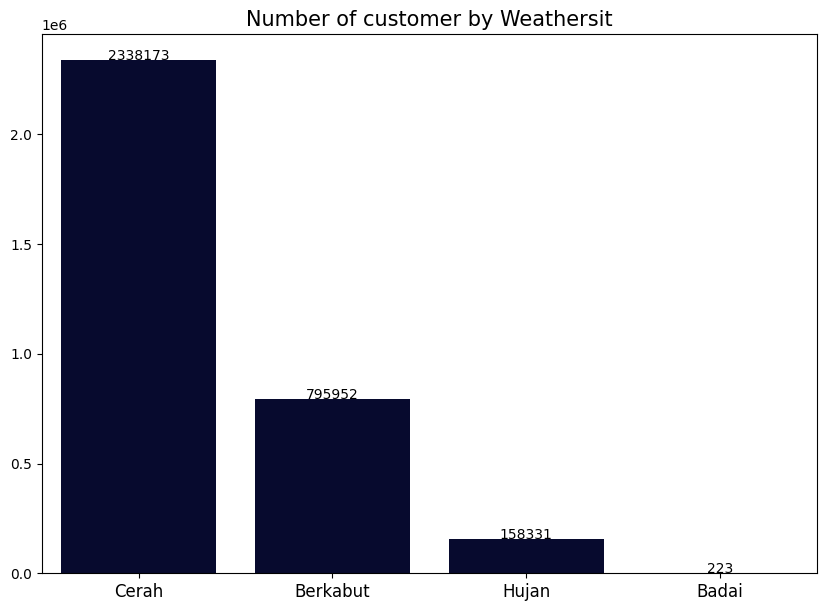

3292679


In [29]:
byweathersit_df = hour_df.groupby('weathersit').agg(
    customer=('cnt', 'sum'),
    instant=('instant', 'nunique')
).reset_index()

byweathersit_df["weathersit"] = byweathersit_df["weathersit"].replace({
    1: "Cerah",
    2: "Berkabut",
    3: "Hujan",
    4: "Badai"
})

weathersit = byweathersit_df["weathersit"]

plt.figure(figsize=(10, 7))

colors = ["#000435"]

sns.barplot(
    y="customer",
    x="weathersit",
    data=byweathersit_df.sort_values(by="customer", ascending=False),
    palette=colors
)
plt.title("Number of customer by Weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
for i, count in enumerate(byweathersit_df["customer"]):
    plt.text(weathersit[i], count + 10, str(count), ha='center')

plt.show()
byweathersit_df.head()
print(sum(byweathersit_df["customer"]))3292679

In [30]:
day_df.to_csv("dashboard/day_data.csv", index=False)
day_df.info()
hour_df.to_csv("dashboard/hour_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Bisa kita lihat ternyata cuaca sangatlah berpengaruh terhadap jumlah pesanan.
- Dapat disimpulkan bahwa orang-orang lebih suka bersepeda di cuaca yang cerah.

## Conclusion

- Dapat kita simpulkan bahwa tren pengguna layanan Bike Sharing cenderung meningkat secara signifikan dari tahun 2011 hingga 2012, di mana jumlah pengguna layanan ini manecapai puncaknya pada kuartal 3 tahun 2012 dengan lebih dari 636.000 sepeda yang tersewa. Sementara titik terendah dari pengguna layanan Bike Sharing ini terdapat di kuartal pertama tahun 2011 dengan lebih dari 150.000 sepeda yang tersewa.
- Dapat kita simpulkan bahwa cuaca sangatlah mempengaruhi besarnya pengguna dari layanan Bike Sharing. Bisa dilihat bahwa pengguna layanan Bike Sharing didominasi pada cuaca cerah. Bahkan 71% pengguna melakukan penyewaan di cuaca yang cerah, berbanding terbalik dengan jumlah pengguna layanan Bike Sharing pada cuaca badai yaitu hanya sebesar 0.0067% dari total seluruh pengguna.
- Dengan tren pengguna layanan Bike Sharing yang terus meningkat signifikan, maka layanan Bike Sharing bisa menjadi salah satu ide bisnis yang cukup menjanjikan. Tentu saja dibarengi dengan sistem pengelolaan yang baik dari pemilik usaha.
- Dalam kurun waktu 2 tahun, tren pengguna layanan Bike Sharing mencapai titik puncaknya di kuartal ketiga setiap tahunnya. Peningkatan kuartal 3 tahun 2011 ke kuartal 3 tahun 2012 mencapai 1.5x lipat! Pencapaian yang luar biasa.